In [1]:
import pandas as pd


df_partidos = pd.read_csv("./data/partidos_cebollitas.csv")


In [4]:
df_partidos["diferencia_goles"] = df_partidos["goles_local"] - df_partidos["goles_visitante"]
df_partidos["ratio_tiros_posesion_local"] = df_partidos["tiros_arco_local"] / df_partidos["posesion_local (%)"]
df_partidos.head(9)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena,0,0.133333
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML,3,0.081633
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML,-1,0.089286
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp,-4,0.150000


In [10]:
df_partidos_cebollitas = df_partidos[(df_partidos["equipo_local"] == "Cebollitas FC") | (df_partidos["equipo_visitante"] == "Cebollitas FC")]
df_partidos_cebollitas.head(9)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena,0,0.133333
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML,-1,0.089286
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML,-3,0.232558
11,2023-03-19,Cebollitas FC,Data United,4,0,49,51,4,12,Estadio DataCamp,4,0.081633
20,2023-05-21,Cebollitas FC,Real Pandas,0,1,47,53,11,5,Estadio ML,-1,0.234043
21,2023-05-28,Cebollitas FC,Real Pandas,3,3,53,47,7,4,Python Arena,0,0.132075


In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_partidos[["posesion_local (%)", "tiros_arco_local", "ratio_tiros_posesion_local"]]
y = df_partidos["goles_local"]

selector = SelectKBest(f_regression, k=2)
selector.fit(X, y)

resultados = pd.DataFrame({"variables": X.columns, "Score": selector.scores_}).sort_values(by="Score", ascending=False)

resultados


,variables,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


In [18]:
from sklearn.tree import DecisionTreeRegressor

X = df_partidos[["posesion_local (%)", "tiros_arco_local", "ratio_tiros_posesion_local"]]
y = df_partidos["goles_local"]

modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X, y)

print(modelo.feature_importances_)

resultados_importancia = pd.DataFrame({"variables": X.columns, "Importancia": modelo.feature_importances_}).sort_values(by="Importancia", ascending=False)

resultados

[0.49156261 0.20268268 0.30575471]


,variables,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


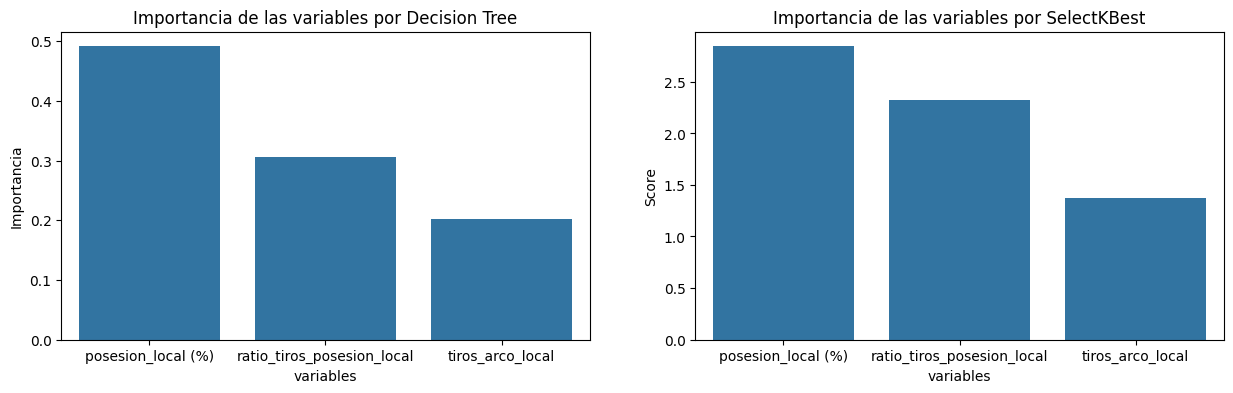

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x="variables", y="Importancia", data=resultados_importancia, ax=ax[0])
ax[0].set_title("Importancia de las variables por Decision Tree")

sns.barplot(x="variables", y="Score", data=resultados, ax=ax[1])
ax[1].set_title("Importancia de las variables por SelectKBest")

plt.show()